In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:


def read_df(path):
    try:
        all_sheets_dict = pd.read_excel(path, sheet_name=None)
        if not all_sheets_dict:
            print(f"Warning: The file '{path}' contains no sheets.")
            return pd.DataFrame()

        all_df = pd.concat(all_sheets_dict.values(), ignore_index=True)
        return all_df

    except ValueError as e:
        print(f"Error reading Excel file: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [3]:
path='/home/abd0g0m3aa/Documents/projects/InvestInMinds_Project2/Financial Literacy By State.xlsx'

df=read_df(path)

df.head()

,Overall Rank,State,Total Score,WalletLiteracy Score,Financial Planning & Habits Rank,Financial Knowledge & Education Rank
0,1,Minnesota,72.46,9,1,3
1,2,Nebraska,69.10,7,30,5
2,3,Virginia,68.44,32,12,1
3,4,Colorado,68.28,10,2,18
4,5,New Hampshire,67.50,4,9,23


In [4]:
summ=df.describe().T 
summ[['25%','75%','50%','mean','std']].rename(columns={'25%':'First Quartile','75%':'Third Quartile','mean':'Mathematical Average','50%':'Median','std':'standard deviation'})

,First Quartile,Third Quartile,Median,Mathematical Average,standard deviation
Overall Rank,13.50,38.50,26.00,26.00000,14.866069
Total Score,60.15,65.92,63.49,62.81451,4.106373
WalletLiteracy Score,13.50,38.50,26.00,26.00000,14.866069
Financial Planning & Habits Rank,13.50,38.50,26.00,26.00000,14.866069
Financial Knowledge & Education Rank,13.50,38.50,26.00,26.00000,14.866069


In [5]:
num_cols=list(col for col in df.select_dtypes(include=np.number).columns)

In [6]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

inliers_mask = ~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

df_inliers = df[inliers_mask]
df_outliers = df[~inliers_mask]


In [7]:
print(f',inliers dataset has the shape of {df_inliers.shape}')
df_inliers.head()

,inliers dataset has the shape of (51, 6)


,Overall Rank,State,Total Score,WalletLiteracy Score,Financial Planning & Habits Rank,Financial Knowledge & Education Rank
0,1,Minnesota,72.46,9,1,3
1,2,Nebraska,69.10,7,30,5
2,3,Virginia,68.44,32,12,1
3,4,Colorado,68.28,10,2,18
4,5,New Hampshire,67.50,4,9,23


In [8]:
df_outliers.shape

(0, 6)

In [9]:
mean = df[num_cols].mean()
std = df[num_cols].std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
inliers_mask = ~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

df_inliers = df[inliers_mask]
df_outliers = df[~inliers_mask]

In [10]:
df_inliers.shape

(51, 6)

In [11]:
df.columns

Index(['Overall Rank ', 'State', 'Total Score ', 'WalletLiteracy Score ',
       'Financial Planning & Habits Rank ',
       'Financial Knowledge & Education Rank '],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr_scaled=scaler.fit_transform((df[num_cols]))
df_scaled=pd.DataFrame(arr_scaled,columns=(df[num_cols]).columns)
df_scaled.head()

,Overall Rank,Total Score,WalletLiteracy Score,Financial Planning & Habits Rank,Financial Knowledge & Education Rank
0,-1.698416,2.372280,-1.154923,-1.698416,-1.562542
1,-1.630479,1.545898,-1.290796,0.271746,-1.426669
2,-1.562542,1.383573,0.407620,-0.951113,-1.698416
3,-1.494606,1.344221,-1.086986,-1.630479,-0.543493
4,-1.426669,1.152383,-1.494606,-1.154923,-0.203810


In [13]:
metric_pairs = [
        ('Total Score ', 'WalletLiteracy Score '),
        ('Total Score ', 'Financial Planning & Habits Rank '),
        ('WalletLiteracy Score ', 'Financial Knowledge & Education Rank ')
                ]

def report(df):
        results_summary = []
        for x, y in metric_pairs:
          X = df_scaled[x]
          y = df_scaled[y]
          X = sm.add_constant(X)
          model = sm.OLS(y, X).fit()
          results_summary.append({
          'Pair': f"{x} ~ {y}",
          'Coefficient': model.params[1],
          'Intercept': model.params[0],
          'P-Value': model.pvalues[1],
          'R-Squared': model.rsquared
        })
    

        summary_df = pd.DataFrame(results_summary)
        display(summary_df)
report(df)


/tmp/ipykernel_4900/4017148970.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': model.params[1],
/tmp/ipykernel_4900/4017148970.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
/tmp/ipykernel_4900/4017148970.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': model.pvalues[1],
/tmp/ipykernel_4900/4017148970.py:16: FutureWarning: Series.__getitem__ treating keys as posi

,Pair,Coefficient,Intercept,P-Value,R-Squared
0,Total Score ~ 0 -1.154923\n1 -1.290796\...,-0.410260,-1.387779e-17,0.002789,0.168314
1,Total Score ~ 0 -1.698416\n1 0.271746\...,-0.503666,-2.081668e-17,0.000165,0.253679
2,WalletLiteracy Score ~ 0 -1.562542\n1 -...,-0.214751,-1.387779e-17,0.130197,0.046118


## **Interpretation of Results**

1. Total Score ~ Financial Planning & Habits Rank

   - **Coefficient (-1.49):** Indicates a negative correlation, meaning that as the Financial Planning & Habits Rank increases, the Total Score decreases.
   - **P-Value (0.002789):** Statistically significant (< 0.05), confirming a meaningful relationship.
   - **R-Squared (0.1683):** The model explains 16.83% of the variation in Total Score, indicating a weak correlation.


2. Total Score ~ Financial Knowledge & Education Rank

   - **Coefficient (-1.82):** Suggests a negative correlation, implying that higher Financial Knowledge & Education Rank leads to a lower Total Score.
   - **P-Value (0.000165):** Highly significant, suggesting a strong statistical relationship.
   - **R-Squared (0.2537):** The model explains 25.37% of the variation in Total Score, showing a moderate correlation.


3. WalletLiteracy Score ~ Financial Knowledge & Education Rank

   - **Coefficient (-0.21):** Indicates a weak negative correlation.
   - **P-Value (0.1302):** Not statistically significant (> 0.05), meaning the relationship may be due to chance.
   - **R-Squared (0.0461):** The model explains only 4.61% of the variation, indicating a very weak correlation.

In [14]:
report(df_scaled)

/tmp/ipykernel_4900/4017148970.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': model.params[1],
/tmp/ipykernel_4900/4017148970.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
/tmp/ipykernel_4900/4017148970.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': model.pvalues[1],
/tmp/ipykernel_4900/4017148970.py:16: FutureWarning: Series.__getitem__ treating keys as posi

,Pair,Coefficient,Intercept,P-Value,R-Squared
0,Total Score ~ 0 -1.154923\n1 -1.290796\...,-0.410260,-1.387779e-17,0.002789,0.168314
1,Total Score ~ 0 -1.698416\n1 0.271746\...,-0.503666,-2.081668e-17,0.000165,0.253679
2,WalletLiteracy Score ~ 0 -1.562542\n1 -...,-0.214751,-1.387779e-17,0.130197,0.046118


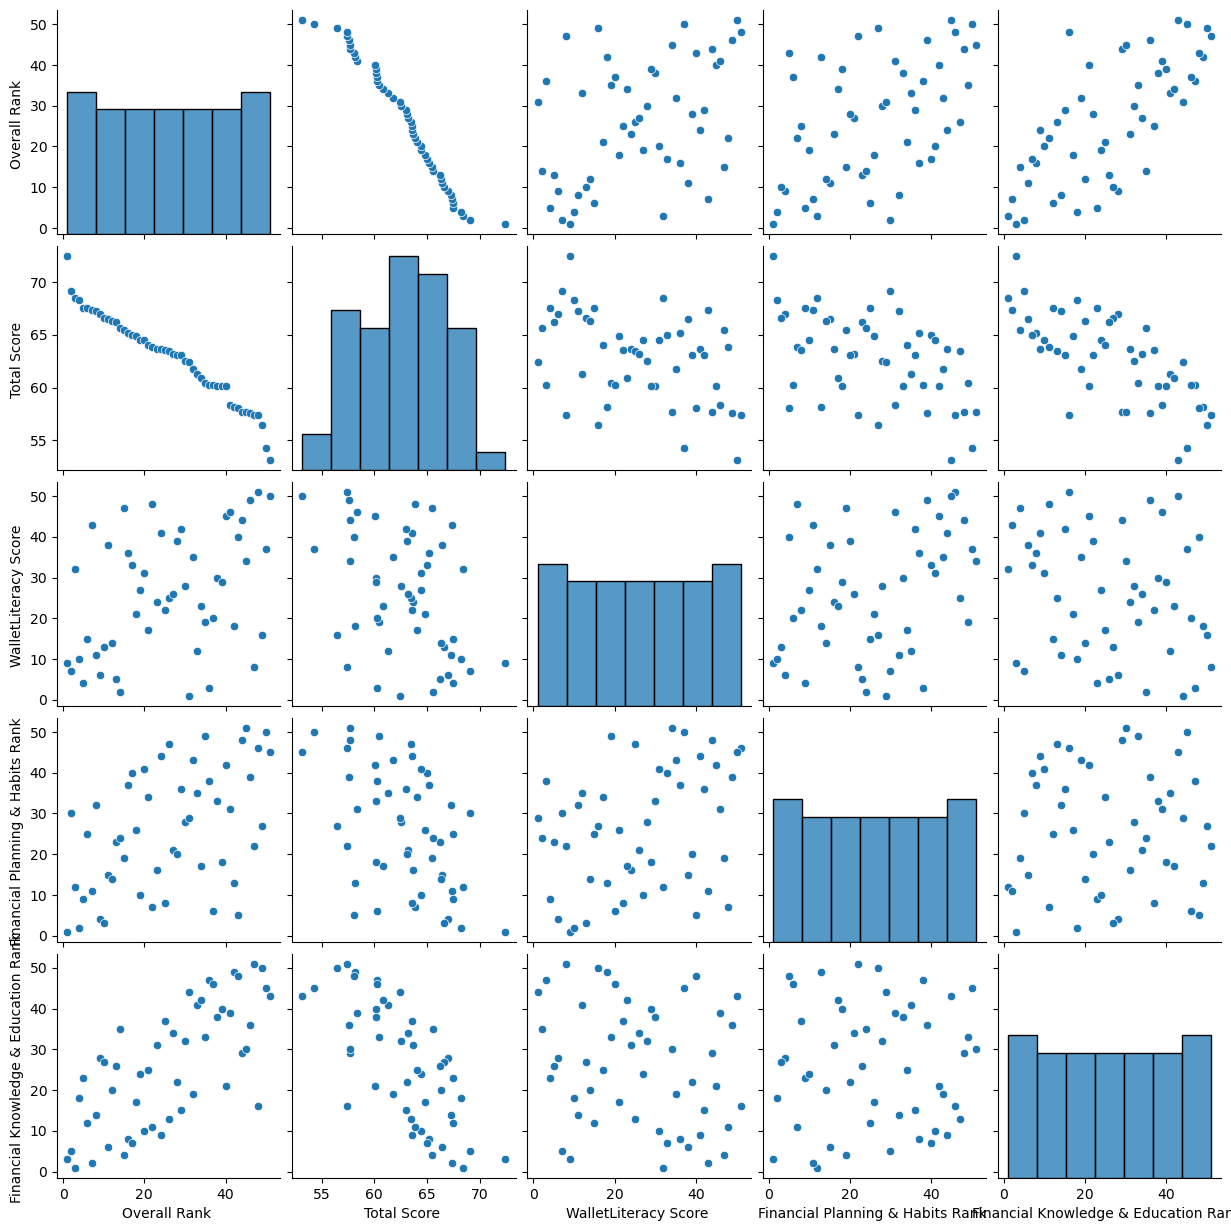

In [15]:
sns.pairplot(df)

In [16]:
df.columns

Index(['Overall Rank ', 'State', 'Total Score ', 'WalletLiteracy Score ',
       'Financial Planning & Habits Rank ',
       'Financial Knowledge & Education Rank '],
      dtype='object')

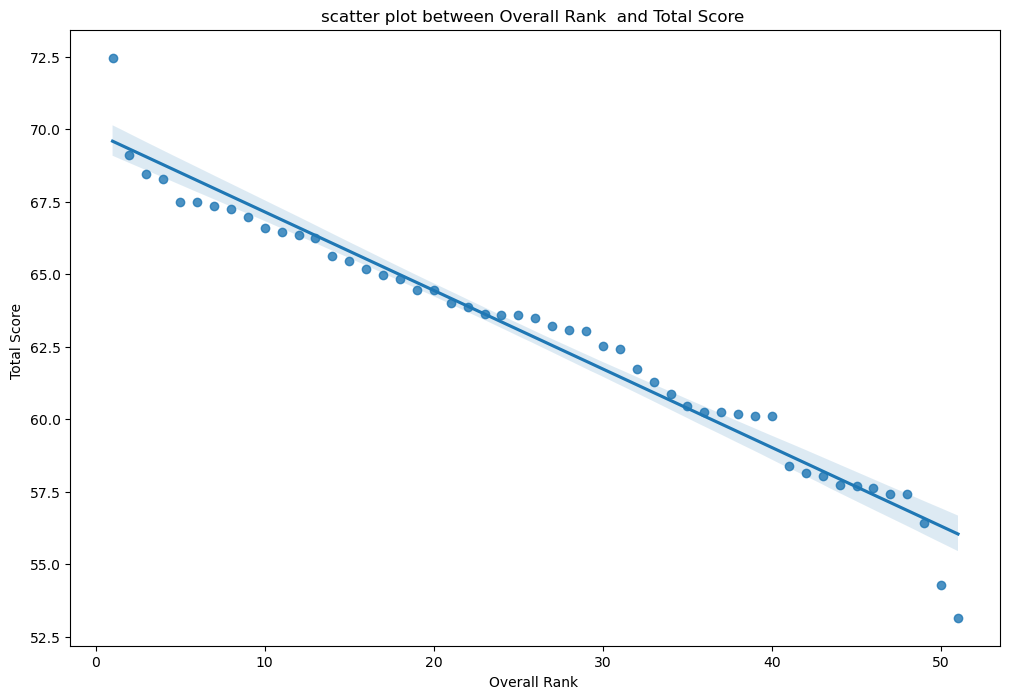

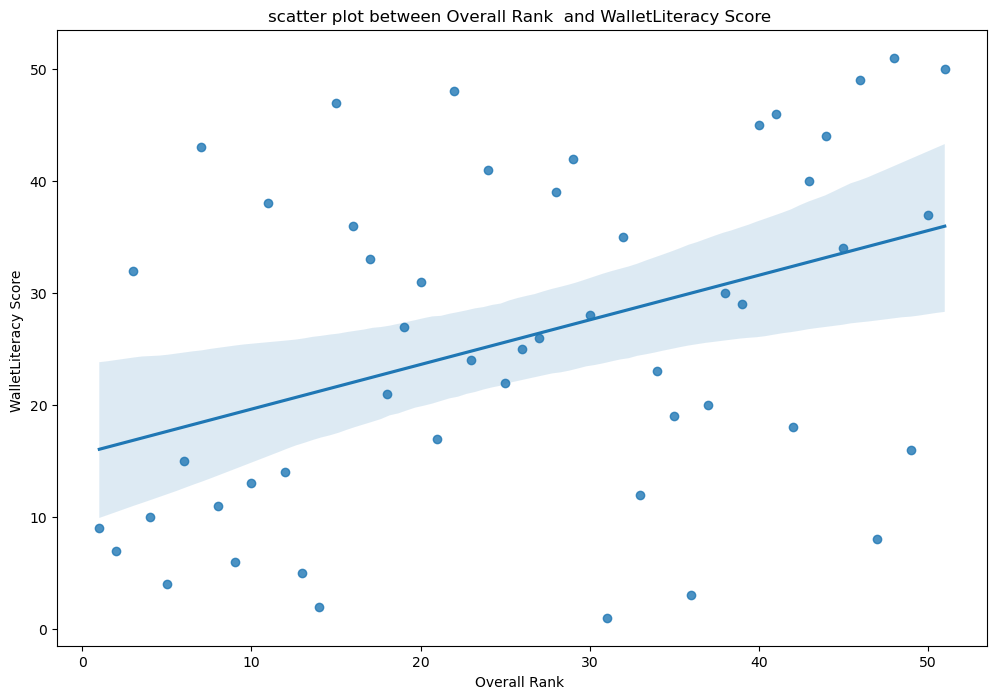

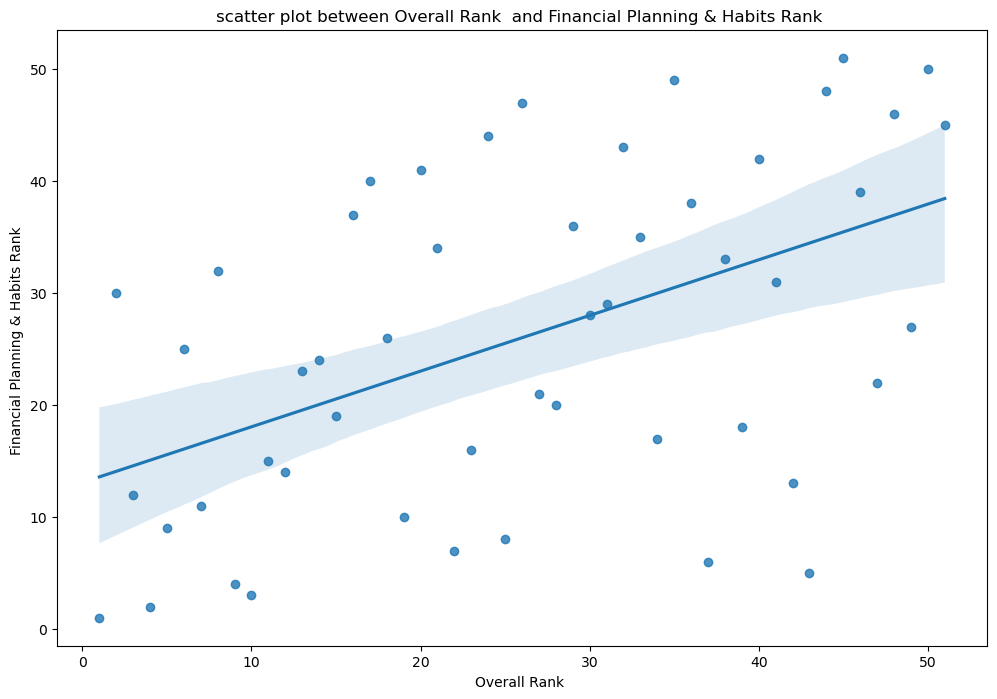

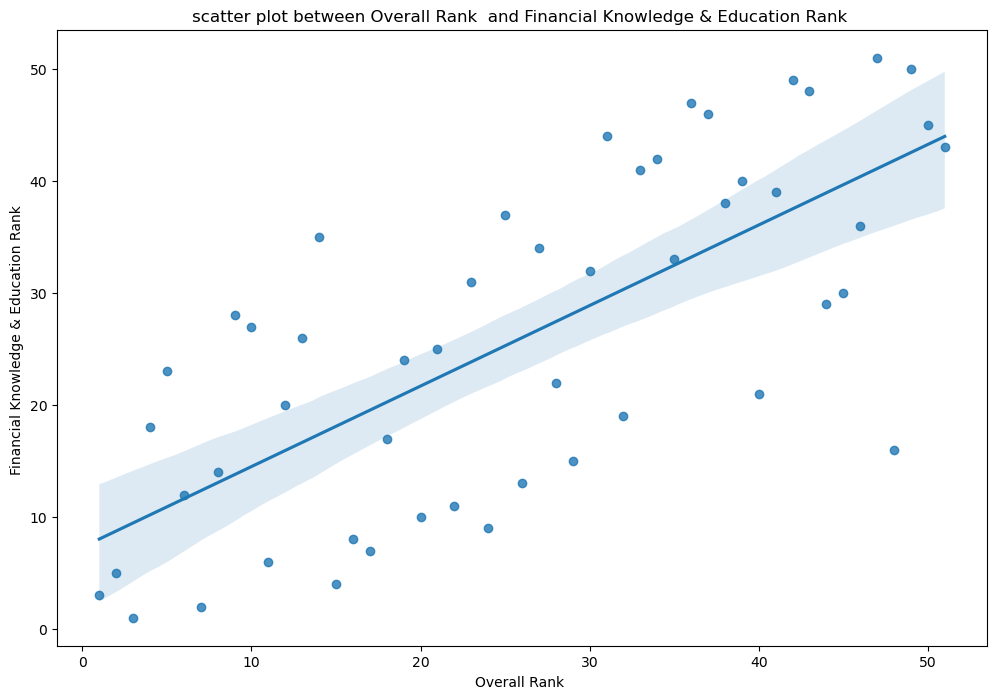

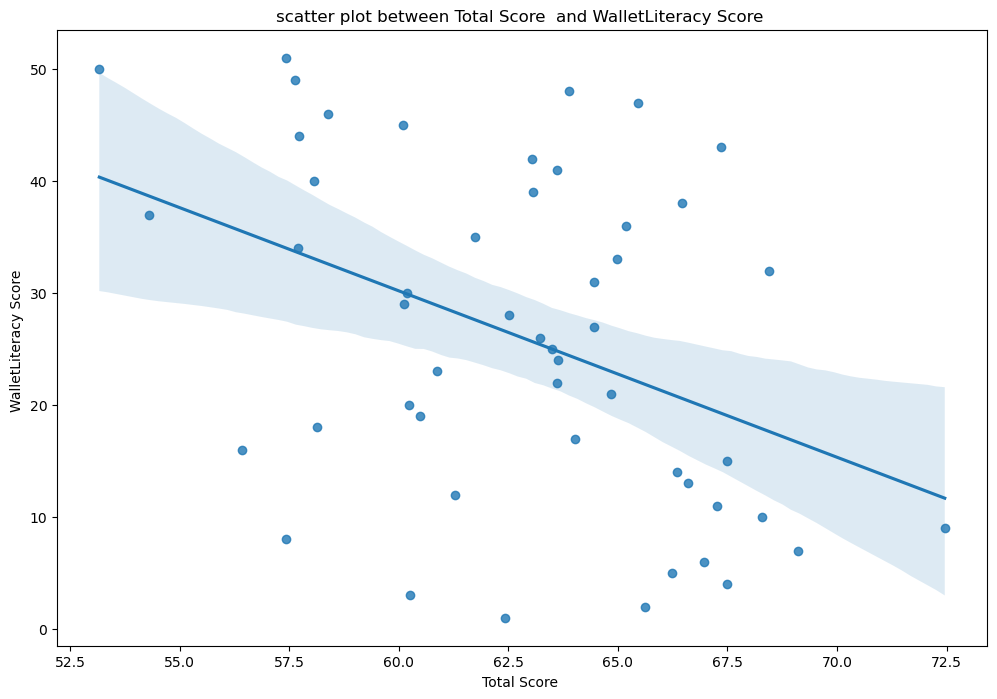

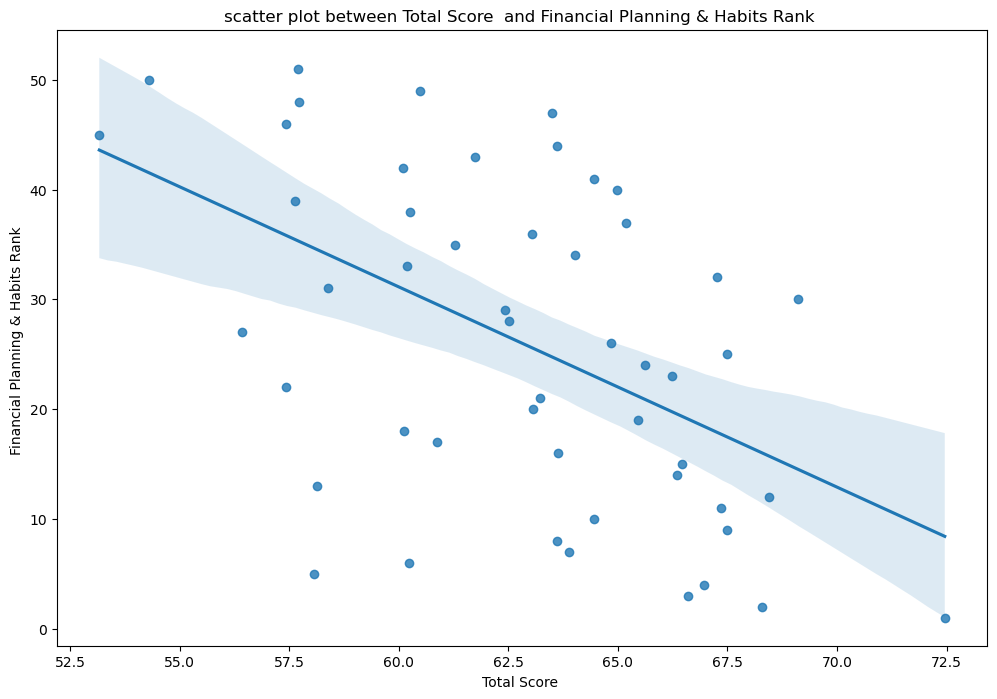

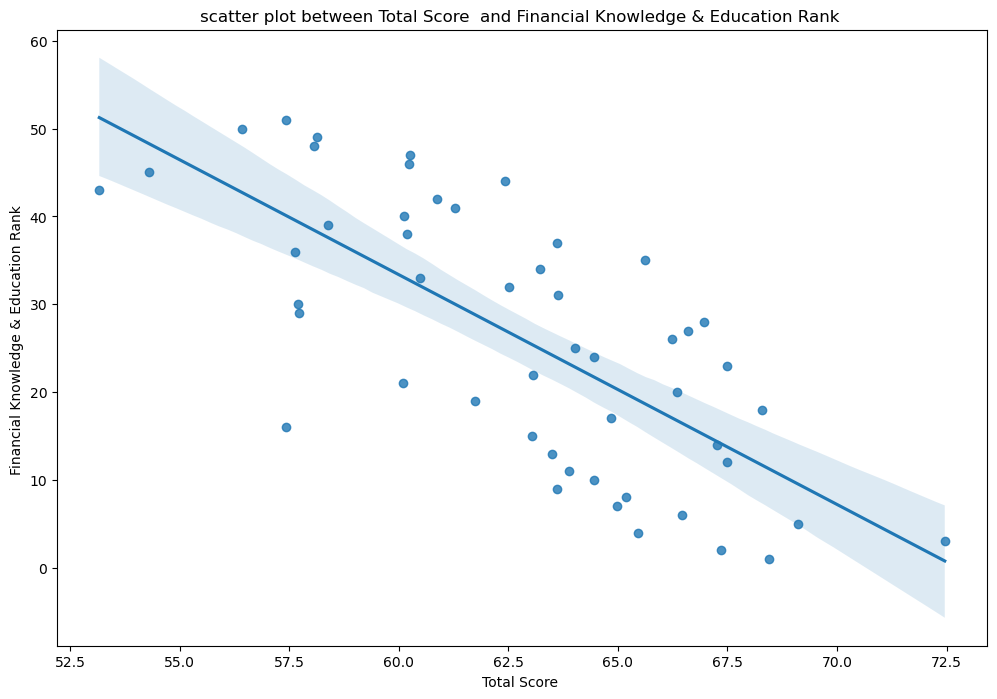

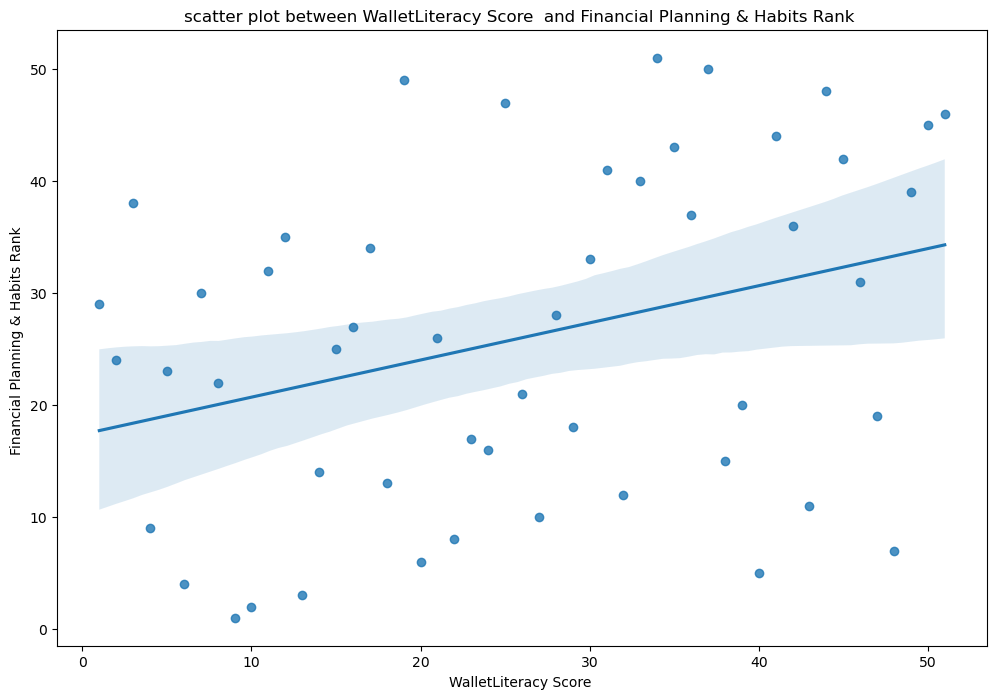

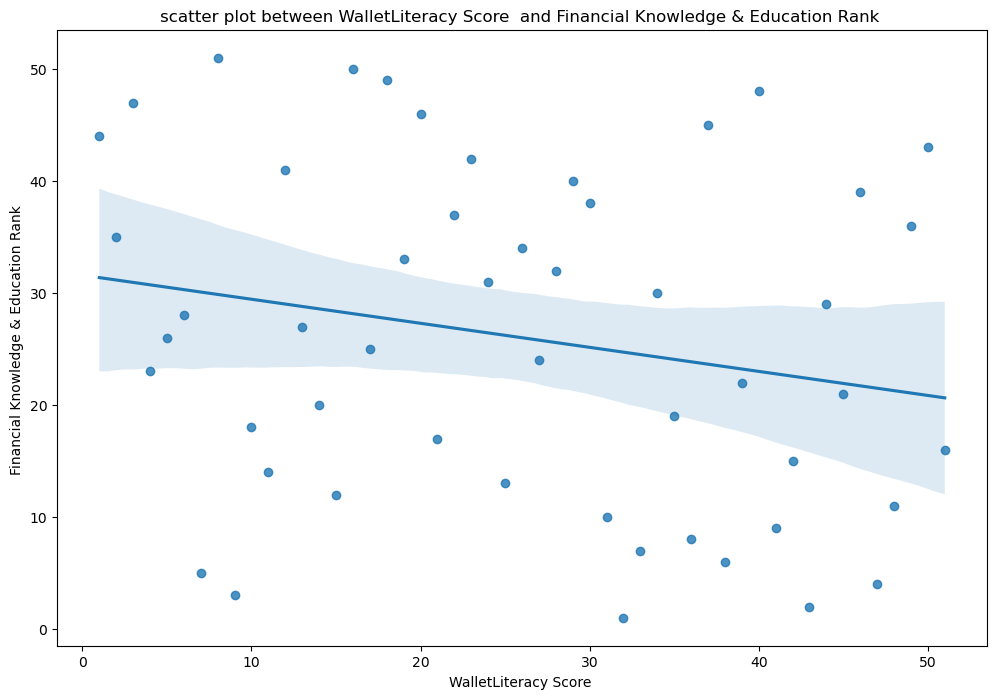

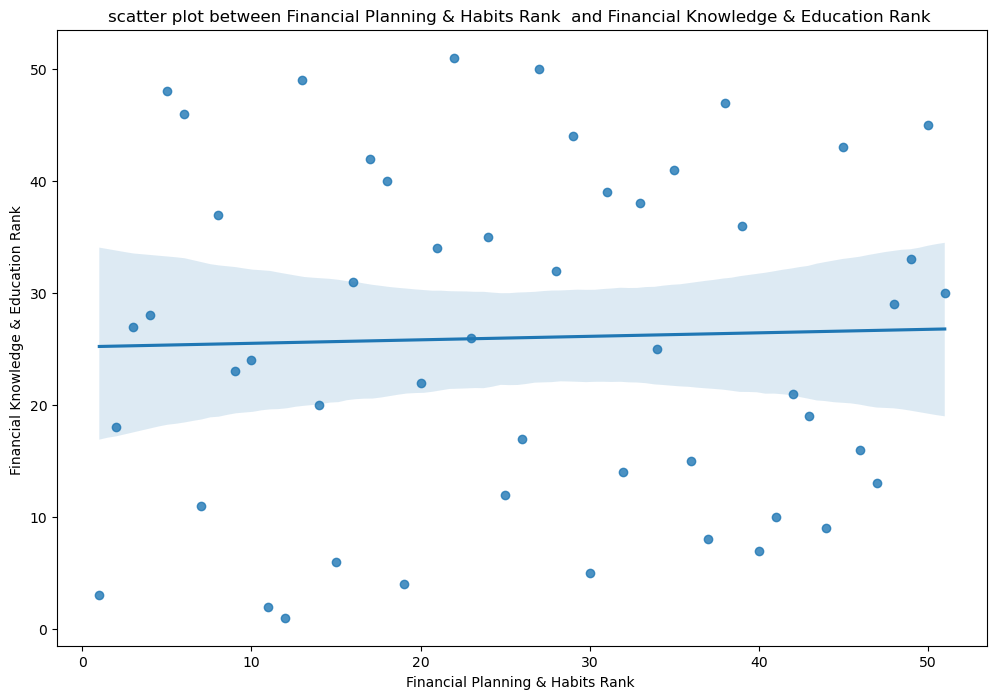

In [17]:
for i in range (len(num_cols)):
    for j in range(i+1,len(num_cols)):
        col1=df[num_cols[i]]
        col2=df[num_cols[j]]
        plt.figure(figsize=(12,8))
        sns.regplot(x=col1,y=col2,data=df)
        plt.title(f'scatter plot between {num_cols[i]} and {num_cols[j]}')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()

In [18]:
for i in range(len(num_cols)):
    for j in range(i+1,len(num_cols)):
        col1=df[num_cols[i]]
        col2=df[num_cols[j]]

        if abs(col1.corr(col2))>0.4:
            print (f',relattionship between {num_cols[i]} and {num_cols[j]} are {col1.corr(col2)}')

,relattionship between Overall Rank  and Total Score  are -0.9802570638747404
,relattionship between Overall Rank  and Financial Planning & Habits Rank  are 0.49710407239819
,relattionship between Overall Rank  and Financial Knowledge & Education Rank  are 0.7190045248868778
,relattionship between Total Score  and WalletLiteracy Score  are -0.41026039367914185
,relattionship between Total Score  and Financial Planning & Habits Rank  are -0.5036659487592178
,relattionship between Total Score  and Financial Knowledge & Education Rank  are -0.7223876203532501
